<a href="https://colab.research.google.com/github/YashLadlapure/Daily_Prep/blob/main/MLL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from io import StringIO

In [2]:
csv_data = """description,units,key,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
"Total : United States","short tons","US",1127688806,1094283061,1071752573,1112098870,1131498099,1162749659,"1146635345","1171808669","1074923392","1084368148","1095627536","1016458418","984841779","1000048758","896940563","728364498","774609357"
"Total : Pennsylvania","short tons","PA",74145764,68393192,63707881,65995922,67493812,66028815,"65048039","65413644","57979452","58593111","59181827","54718802","54008748","60909704","50030833","45719786","49085344"
"Total : Illinois","short tons","IL",33783442,33314366,31640024,31852986,32013963,32728800,"32445245","32918044","33748428","33241392","37770397","48486048","52147193","57969300","56101030","43422136","48204145"
"Total : West Virginia","short tons","WV",162415815,150077736,139711310,147993201,153649647,152373615,"153479515","157778087","137127322","135219749","134661745","120424758","112786287","112187373","95632900","79757315","92790774"
"Total : Kentucky","short tons","KY",133834374,124141999,112805618,114243649,119733923,120847953,"115280302","120322708","107338054","104960118","108766150","90861804","80379779","77334723","61424961","42867898","41784412"
"Total : Wyoming","short tons","WY",368749172,373161336,376269987,396493092,404318534,446742253,"453568259","467644168","431106631","442522372","438673388","401441611","387923828","395665099","375772504","297218132","316454445"
"Total : Washington","short tons","WA",4624245,5827162,6231874,5653221,5265672,2579549,"--","--","--","--","--","--","--","--","--","--","--"
"""

df = pd.read_csv(StringIO(csv_data), na_values=['--'])

print("--- 1. Raw Data Info ---")
print(df.info())

--- 1. Raw Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  7 non-null      object 
 1   units        7 non-null      object 
 2   key          7 non-null      object 
 3   2001         7 non-null      int64  
 4   2002         7 non-null      int64  
 5   2003         7 non-null      int64  
 6   2004         7 non-null      int64  
 7   2005         7 non-null      int64  
 8   2006         7 non-null      int64  
 9   2007         6 non-null      float64
 10  2008         6 non-null      float64
 11  2009         6 non-null      float64
 12  2010         6 non-null      float64
 13  2011         6 non-null      float64
 14  2012         6 non-null      float64
 15  2013         6 non-null      float64
 16  2014         6 non-null      float64
 17  2015         6 non-null      float64
 18  2016         6 non-null      

In [3]:
df.fillna(0, inplace=True)

df_states = df[df['key'] != 'US'].copy().reset_index(drop=True)


scaler = MinMaxScaler()
year_columns = [str(y) for y in range(2001, 2018)] # Columns '2001' to '2017'
df_states[year_columns] = scaler.fit_transform(df_states[year_columns])

print("\n--- 2. Processed Data (First 5 Rows) ---")
print(df_states[['key'] + year_columns[:5]].head())



--- 2. Processed Data (First 5 Rows) ---
  key      2001      2002      2003      2004      2005
0  PA  0.190928  0.170325  0.155325  0.154392  0.155940
1  IL  0.080080  0.074829  0.068664  0.067035  0.067029
2  WV  0.433345  0.392696  0.360718  0.364190  0.371840
3  KY  0.354851  0.322090  0.288007  0.277839  0.286850
4  WY  1.000000  1.000000  1.000000  1.000000  1.000000


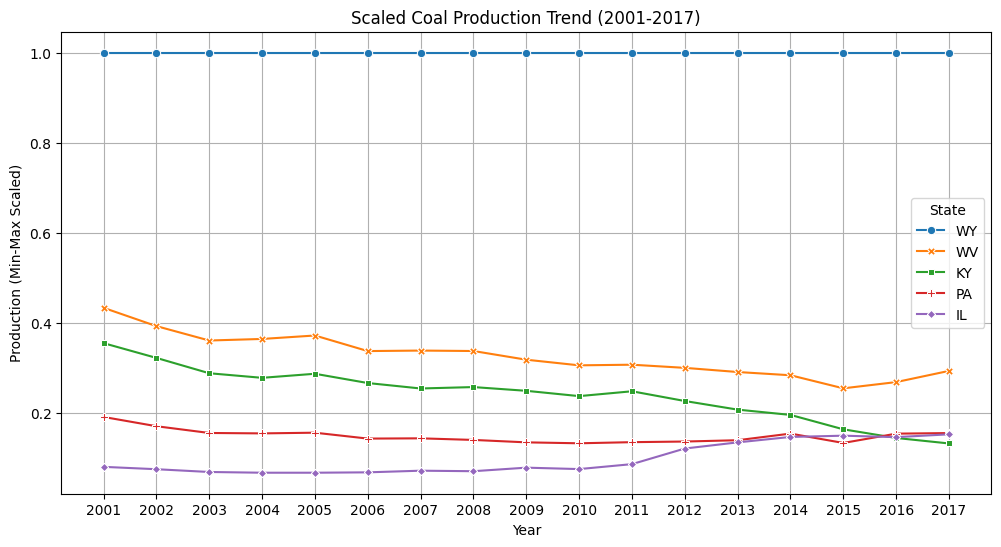

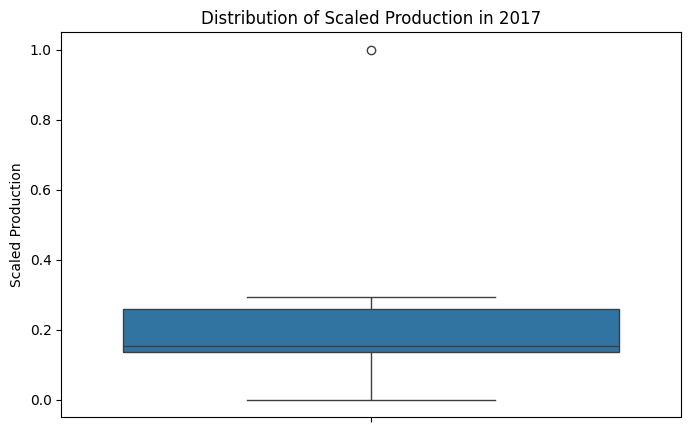

In [4]:
plt.figure(figsize=(12, 6))

df_plot = df_states.set_index('key')[year_columns].T

selected_states = ['WY', 'WV', 'KY', 'PA', 'IL']
sns.lineplot(data=df_plot[selected_states], markers=True, dashes=False)

plt.title('Scaled Coal Production Trend (2001-2017)')
plt.ylabel('Production (Min-Max Scaled)')
plt.xlabel('Year')
plt.grid(True)
plt.legend(title='State')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(y=df_states['2017'])
plt.title('Distribution of Scaled Production in 2017')
plt.ylabel('Scaled Production')
plt.show()